In [1]:
import numpy as np 
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold
from scipy import sparse
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import euclidean_distances
import SemisupFns as SF
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import MiscFcns as MF
import seaborn as sns
import scipy.stats as ss
import mygene
from sklearn.preprocessing import StandardScaler
from scipy.stats.stats import pearsonr
%matplotlib inline

In [44]:
Dat = pd.read_csv('amp_ad_agg_feature_set.csv')
Dat.head()

,aggregateCBEblueCBEdegree,aggregateCBEblueCBEauthority_score,aggregateCBEblueCBEcloseness,aggregateCBEblueCBEeccentricity,aggregateCBEblueCBEcentr_betw,aggregateCBEblueCBEpagerank,aggregateCBEbrownCBEdegree,aggregateCBEbrownCBEauthority_score,aggregateCBEbrownCBEcloseness,aggregateCBEbrownCBEeccentricity,...,aggregateTCXturquoiseTCXeccentricity,aggregateTCXturquoiseTCXcentr_betw,aggregateTCXturquoiseTCXpagerank,aggregateTCXyellowTCXdegree,aggregateTCXyellowTCXauthority_score,aggregateTCXyellowTCXcloseness,aggregateTCXyellowTCXeccentricity,aggregateTCXyellowTCXcentr_betw,aggregateTCXyellowTCXpagerank,GeneID
0,0,0.000000,0.000000e+00,0,0.000000,0.000000,0,0.0,0.0,0,...,0,0.000000,0.000000,0,0.0,0.0,0,0.0,0.0,ENSG00000000003
1,0,0.000000,0.000000e+00,0,0.000000,0.000000,0,0.0,0.0,0,...,0,0.000000,0.000000,0,0.0,0.0,0,0.0,0.0,ENSG00000000419
2,7,0.002168,5.944455e-07,13,9447.072584,0.000393,0,0.0,0.0,0,...,0,0.000000,0.000000,0,0.0,0.0,0,0.0,0.0,ENSG00000000457
3,0,0.000000,0.000000e+00,0,0.000000,0.000000,0,0.0,0.0,0,...,6,1329.080162,0.001071,0,0.0,0.0,0,0.0,0.0,ENSG00000000938
4,0,0.000000,0.000000e+00,0,0.000000,0.000000,0,0.0,0.0,0,...,6,1316.848500,0.001115,0,0.0,0.0,0,0.0,0.0,ENSG00000000971


In [45]:
l = list(Dat)
v = ['CBE','DLPFC','TCX','FP','GeneID']
l2 = []

for i in range(len(l)):
    f = 0
    for j in range(len(v)):
        if v[j] not in l[i]:
            f = f + 1

    if f == len(v):
        l2 += [l[i]]


Dat = Dat.drop(l2, axis = 1)
Dat.head()

,aggregateCBEblueCBEdegree,aggregateCBEblueCBEauthority_score,aggregateCBEblueCBEcloseness,aggregateCBEblueCBEeccentricity,aggregateCBEblueCBEcentr_betw,aggregateCBEblueCBEpagerank,aggregateCBEbrownCBEdegree,aggregateCBEbrownCBEauthority_score,aggregateCBEbrownCBEcloseness,aggregateCBEbrownCBEeccentricity,...,aggregateTCXturquoiseTCXeccentricity,aggregateTCXturquoiseTCXcentr_betw,aggregateTCXturquoiseTCXpagerank,aggregateTCXyellowTCXdegree,aggregateTCXyellowTCXauthority_score,aggregateTCXyellowTCXcloseness,aggregateTCXyellowTCXeccentricity,aggregateTCXyellowTCXcentr_betw,aggregateTCXyellowTCXpagerank,GeneID
0,0,0.000000,0.000000e+00,0,0.000000,0.000000,0,0.0,0.0,0,...,0,0.000000,0.000000,0,0.0,0.0,0,0.0,0.0,ENSG00000000003
1,0,0.000000,0.000000e+00,0,0.000000,0.000000,0,0.0,0.0,0,...,0,0.000000,0.000000,0,0.0,0.0,0,0.0,0.0,ENSG00000000419
2,7,0.002168,5.944455e-07,13,9447.072584,0.000393,0,0.0,0.0,0,...,0,0.000000,0.000000,0,0.0,0.0,0,0.0,0.0,ENSG00000000457
3,0,0.000000,0.000000e+00,0,0.000000,0.000000,0,0.0,0.0,0,...,6,1329.080162,0.001071,0,0.0,0.0,0,0.0,0.0,ENSG00000000938
4,0,0.000000,0.000000e+00,0,0.000000,0.000000,0,0.0,0.0,0,...,6,1316.848500,0.001115,0,0.0,0.0,0,0.0,0.0,ENSG00000000971


In [46]:
Dat.to_csv('amp_ad_agg_feature_set_mod.csv')

In [54]:
bla = pd.read_csv('EC2_subNet_gw_probs.csv')
bla.head()

,Unnamed: 0,Gene,Y0a,Y0b
0,0,ENSG00000000003,0.664140,0.509187
1,1,ENSG00000000419,0.664117,0.509186
2,2,ENSG00000000457,0.009428,0.492908
3,3,ENSG00000000938,0.664071,0.509183
4,4,ENSG00000000971,0.664048,0.509182


In [56]:
bla.shape

(14448, 4)

(array([ 342.,    0.,    0.,    0.,  416., 2849., 2698., 2649., 2670.,
        2824.]),
 array([0.21934022, 0.25607258, 0.29280495, 0.32953731, 0.36626967,
        0.40300203, 0.4397344 , 0.47646676, 0.51319912, 0.54993148,
        0.58666385]),
 <a list of 10 Patch objects>)

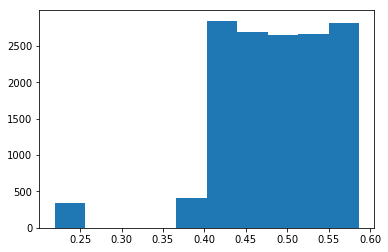

In [57]:
plt.hist((bla.Y0a + bla.Y0b)/2.0)

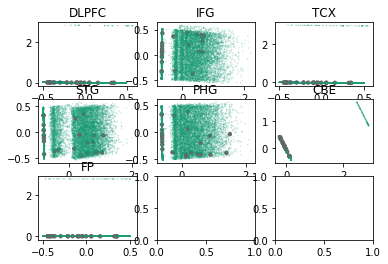

In [37]:
#plotting different brain regions 
#Dat = pd.read_csv('amp_ad_subNet_feature_set_GW_comp5.csv')
br = ['DLPFC','IFG','TCX','STG','PHG','CBE','FP']
l = list(Dat)

Y = pd.read_excel('./ResponseVec_040318.xlsx')
Y = Y.drop(['GeneID'], axis = 1)

fig, axes = plt.subplots(3, 3)

path = 'amp_ad_subNet_feature_set_GW5_'

for i in range(len(br)):
    #l2 = []
    #for j in range(len(l)):
    #    if br[i] not in l[j]:
    #        l2+= [l[j]]
    #X = Dat.drop(l2,axis = 1)
    #X = X.fillna(0)
    path2 = path + br[i] + '.csv'
    Dat = pd.read_csv(path2)
    X = Dat.drop(['GeneID'],axis=1)
    X = X.fillna(0)
    
    
    pca = PCA(n_components=2)
    X2 = X - X.min(axis = 0)
    X2 = X2.abs()
    X_normed = X.values / X2.values.max(axis=0)
    pca.fit(X_normed)
    X_pca = pca.fit_transform(X_normed)

    axes[i/3, i%3].scatter(X_pca[:,0],X_pca[:,1], c = Y.values[:,0] , 
            s =(Y.values[:,0] +.5)**6, cmap = 'Dark2')
    axes[i/3, i%3].title.set_text(br[i])



In [32]:
Dat.head()

,Unnamed: 0,CBE_0,CBE_2,CBE_3,CBE_4,CBE_5,CBE_6,CBE_7,CBE_8,CBE_9,...,FP_11,FP_12,FP_13,FP_14,FP_15,FP_16,FP_17,FP_18,FP_19,GeneID
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,ENSG00000000003
1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,ENSG00000000419
2,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,ENSG00000000457
3,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,ENSG00000000938
4,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,ENSG00000000971


In [85]:
br = ['DLPFC','TCX','CBE','FP']

Y = pd.read_excel('./ResponseVec_040318.xlsx')
GeneID = Y['GeneID']
Y = Y.drop(['GeneID'], axis = 1)

path = 'EC2_subNet_probs_GW5_'

Dat = dict()

X = pd.read_csv('EC2_agg_probs.csv')
Dat['agg1'] = X['Y0a']
Dat['agg2'] = X['Y0b'] 

X = pd.read_csv('EC2_de_probs.csv')
Dat['de1'] = X['Y0a']
Dat['de2'] = X['Y0b'] 

for i in range(len(br)):
    
    path2 = path + br[i] + '.csv'
    
    X = pd.read_csv(path2)
    
    t1 = br[i] + '1'
    t2 = br[i] + '2'
    
    Dat[t1] = X['Y0a']
    Dat[t2] = X['Y0b']
    

Dat['GeneID'] = GeneID    
Dat = pd.DataFrame(Dat)

Dat.head()
    


,CBE1,CBE2,DLPFC1,DLPFC2,FP1,FP2,GeneID,TCX1,TCX2,agg1,agg2,de1,de2
0,0.661600,0.625580,0.660437,0.550150,0.661473,0.660765,ENSG00000000003,0.661527,0.660791,1.749555e-13,4.475803e-11,1.230349e-09,3.475259e-04
1,0.661576,0.625561,0.660414,0.550142,0.661450,0.660742,ENSG00000000419,0.661503,0.660768,3.693869e-12,1.316660e-10,9.555910e-02,1.002537e-01
2,0.661553,0.625542,0.660390,0.550135,0.009437,0.035629,ENSG00000000457,0.661480,0.660744,3.219836e-13,1.806449e-09,9.553836e-02,1.002337e-01
3,0.661530,0.625524,0.660367,0.550127,0.661403,0.660695,ENSG00000000938,0.661456,0.660721,2.084932e-14,4.044819e-11,2.263782e-13,1.885235e-08
4,0.661507,0.625505,0.660344,0.550119,0.661380,0.660672,ENSG00000000971,0.661433,0.660698,1.376738e-14,1.243395e-11,6.586744e-10,3.601858e-05


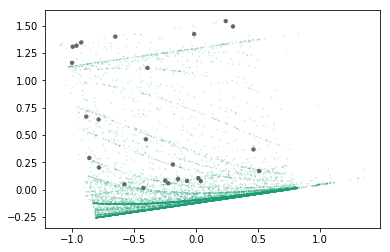

In [86]:
X = Dat.drop(['GeneID'],axis=1)
X = X.fillna(0)


pca = PCA(n_components=2)
X2 = X - X.min(axis = 0)
X2 = X2.abs()
X_normed = X.values / X2.values.max(axis=0)
pca.fit(X_normed)
X_pca = pca.fit_transform(X_normed)
#X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1], c = Y.values[:,0] , 
        s =(Y.values[:,0] +.5)**6, cmap = 'Dark2')

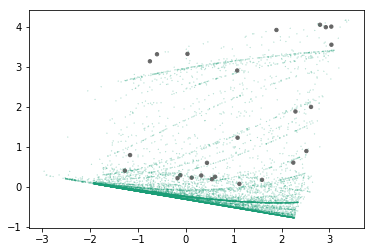

In [89]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2,interaction_only = True, include_bias= False)
X = Dat.drop(['GeneID'],axis=1)
X = X.fillna(0)

X = pd.DataFrame(poly.fit_transform(X))




pca = PCA(n_components=2)
X2 = X - X.min(axis = 0)
X2 = X2.abs()
X_normed = X.values / X2.values.max(axis=0)
pca.fit(X_normed)
X_pca = pca.fit_transform(X_normed)
#X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1], c = Y.values[:,0] , 
        s =(Y.values[:,0] +.5)**6, cmap = 'Dark2')

In [90]:
X2['GeneID'] = GeneID
X2.head()
X2.to_csv('amp_ad_subNet_GW_agg_de_poly2.csv')